In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy

from scipy.io import loadmat
from scipy.optimize import minimize

%matplotlib inline


# Multi-class Classification

In [4]:
data = loadmat("ex3data1.mat")
print(data.keys())

dict_keys(['__globals__', 'X', '__version__', '__header__', 'y'])


In [6]:
X = np.c_[np.ones(data['X'].shape[0]), data['X']]
y = data['y']

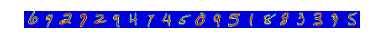

In [7]:
randSelect = np.random.choice(X.shape[0],20)
plt.imshow(X[randSelect,1:].reshape(-1,20).T)
plt.axis('off');

##### Use the same code from Logistic Regression

In [8]:
def sigmoid(z):
    return scipy.special.expit(z)

In [70]:
def costFunctionReg(theta, reg, X,y):
    m = y.size
    h = scipy.special.expit(X.dot(theta))
    J = (-1/m) * (np.log(h).T.dot(y) + np.log(1-h.T).dot(1-y)) + (reg/(2*m)) * np.sum(np.square(theta[1:]))
    
    if(np.isnan(J[0])):
        return np.inf
    return(J[0])

In [74]:
def gradientReg(theta,reg,X,y):
    m = y.size
    h = scipy.special.expit(X.dot(theta.reshape(-1,1)))
    grad = 1/m * X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return(grad.flatten())

In [72]:
initial_theta = np.zeros(X.shape[1])
costFunctionReg(initial_theta,1,X,y)

160.39425758157125

In [83]:
def oneVsAll(X, y, nLabels, reg):
    initial_theta = np.zeros((X.shape[1],1))
    all_theta = np.zeros((nLabels, X.shape[1]))
    for c in np.arange(1, nLabels+1):
        optimizeCF_reg = minimize(costFunctionReg,initial_theta, args=(reg,X,(y==c)*1), method=None, 
                                  jac=gradientReg, options={'maxiter':500})
        all_theta[c-1] = optimizeCF_reg.x
    return all_theta

In [84]:
theta = oneVsAll(X,y,10,0.2)

In [85]:
theta

array([[ -2.87802742e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.55366668e-03,   3.50378175e-08,   0.00000000e+00],
       [ -3.52255282e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.28140508e-02,  -1.45382543e-03,   0.00000000e+00],
       [ -5.39301342e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -5.85981173e-05,  -3.49832007e-07,   0.00000000e+00],
       ..., 
       [ -8.77133782e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -2.91696667e-04,   2.97872690e-05,   0.00000000e+00],
       [ -5.26101358e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -6.59959213e-03,   5.04472783e-04,   0.00000000e+00],
       [ -6.93258979e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -1.30089247e-04,   5.93662012e-06,   0.00000000e+00]])

In [86]:
def predictOneVsAll(all_theta, X):
    probs = sigmoid(X.dot(all_theta.T))
    # Adding one because Python uses zero based indexing for the 10 columns (0-9),
    # while the 10 classes are numbered from 1 to 10.
    return(np.argmax(probs, axis=1)+1)

In [97]:
pred = predictOneVsAll(theta, X)
print(pred)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

[10 10 10 ...,  9  9  7]
Training set accuracy: 95.86 %
